#  Lending Club Case Study
#### You work for a consumer finance company which specialises in lending various types of loans to urban customers.  When the company receives a loan application, the company has to make a decision for loan approval based on the  applicant’s profile. Two types of risks are associated with the bank’s decision: If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company  If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to  a financial loss for the company .The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


# Data Loading and Understanding  

### Importing packages

In [1]:
# importing libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns",None)

In [2]:
#reading the csv file
loans = pd.read_csv("loan.csv")

In [3]:
loans.head() #checking the first 5 rows of the file 


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
loans.info(verbose=True)
# here we can see there are 111 columns and 39717 rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [5]:
loans.shape
#this is the shape of the file

(39717, 111)

In [6]:
loans.describe() #the summary description of the file 


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [7]:
loans.isnull().sum() # this here shows the number of null values in each column

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


# Data cleaning and preparing:

### As we can see there are columns with lot of null values ...we drop them 

In [8]:
#here we are dropping the columns which are having more than 50 % of the null values.
loans = loans.drop(columns=list(loans.columns[(loans.isna().sum()/len(loans.index) >=.5)]))

In [9]:
#lets check the shape again
loans.shape

(39717, 54)

In [10]:
# so almost 50% of the columns are now gone
#this is to show the percentage of null values in each column
null_val_dict={}
for i in loans.columns:
    null_val_dict[i]=round((loans[i].isnull().sum()/loans.shape[0])*100,2)
null_val_dict

{'id': 0.0,
 'member_id': 0.0,
 'loan_amnt': 0.0,
 'funded_amnt': 0.0,
 'funded_amnt_inv': 0.0,
 'term': 0.0,
 'int_rate': 0.0,
 'installment': 0.0,
 'grade': 0.0,
 'sub_grade': 0.0,
 'emp_title': 6.19,
 'emp_length': 2.71,
 'home_ownership': 0.0,
 'annual_inc': 0.0,
 'verification_status': 0.0,
 'issue_d': 0.0,
 'loan_status': 0.0,
 'pymnt_plan': 0.0,
 'url': 0.0,
 'desc': 32.58,
 'purpose': 0.0,
 'title': 0.03,
 'zip_code': 0.0,
 'addr_state': 0.0,
 'dti': 0.0,
 'delinq_2yrs': 0.0,
 'earliest_cr_line': 0.0,
 'inq_last_6mths': 0.0,
 'open_acc': 0.0,
 'pub_rec': 0.0,
 'revol_bal': 0.0,
 'revol_util': 0.13,
 'total_acc': 0.0,
 'initial_list_status': 0.0,
 'out_prncp': 0.0,
 'out_prncp_inv': 0.0,
 'total_pymnt': 0.0,
 'total_pymnt_inv': 0.0,
 'total_rec_prncp': 0.0,
 'total_rec_int': 0.0,
 'total_rec_late_fee': 0.0,
 'recoveries': 0.0,
 'collection_recovery_fee': 0.0,
 'last_pymnt_d': 0.18,
 'last_pymnt_amnt': 0.0,
 'last_credit_pull_d': 0.01,
 'collections_12_mths_ex_med': 0.14,
 'polic

In [11]:
#now the data is better with very less number of null values
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
#now we remove few more columns which are not necessary for the analysis
loans = loans.drop(columns = ["desc","title","url","zip_code","emp_title"])

In [13]:
loans.shape # now we can see the difference fromm 54 columns to 48 columns 

(39717, 49)

In [14]:
loans.tax_liens.value_counts() # it has a single value which is not useful

0.0    39678
Name: tax_liens, dtype: int64

In [15]:
loans.pymnt_plan.value_counts() #single values

n    39717
Name: pymnt_plan, dtype: int64

Here we can observe few columns having single values and also which are not necessary. So, let us drop them.

In [16]:
loans.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [17]:
loans.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [18]:
# single value columns
lst = []
for x in loans.columns:
    if len(loans[x].value_counts())<=1:
        lst.append(x)
print(lst)

#so these are the columns which are having single values and not useful for analysis

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [149]:
#loans.total_pymnt.value_counts()

In [20]:
loans = loans.drop(columns = lst)
# we have removed all the single valued columns


In [21]:
# now we check the number of columns again
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [22]:
loans.shape # we have 39 columns now

(39717, 40)

In [23]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [24]:
lst1=['delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'] 

#these are some columns which are customer behavioural and they cannot be used as predicators for credit appproval 
#so ,we are dropping them ....these are the columns which will be known after the loan has been approved so we need the variable
# which we get at the initial stage and which can be used to predict if we can approve loan or not based on those factors


In [25]:
loans.drop(['delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],axis=1,inplace= True)

In [26]:
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0


In [27]:
loans.shape

(39717, 20)

In [28]:
loans.isnull().sum() # we can see two columns with nulls now



id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

# handling null values


In [29]:
loans.isnull().sum() # these are almost clean now 

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [30]:
# so we need to handle two columns emp_length,pub_rec_bankruptcies
loans.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [31]:
# Data cleaning
# Lets format employment length column to have only numbers. It may play important role in analysis further.
loans.emp_length.fillna('0',inplace=True) # replacing the emp_length null values with 0 
loans['emp_length']=loans.emp_length.str.extract('(\d+)')  # here [\d+ = one or more digits [0-9] we are extracting digits out of it ]
loans['emp_length']=loans.emp_length.apply(lambda x: int(x)) # applying lambda function to convert into integer


In [32]:
# now let's check again 
loans.emp_length.value_counts() # extra characters are gone

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [33]:
#now let's check pub_rec_bankruptcies  
loans.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [34]:
loans.pub_rec_bankruptcies.isnull().sum() 

697

In [35]:
loans = loans[~(loans.pub_rec_bankruptcies.isna())] 
# we have removed the null values here 

In [36]:
loans.pub_rec_bankruptcies.isnull().sum()  # no null values in nthis colummn now

0

In [37]:
loans.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [38]:
# now we have a clean data with no null values 

## Checking the datatypes 

In [39]:
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0


In [40]:
loans.issue_d = pd.to_datetime(loans.issue_d, format='%b-%y')
# here wehave converted the column into datetime datatype 

In [41]:
loans.head(5) # we can see the issue date column got converted to datetime

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0.0


In [42]:
# int_rate , term, are to be cleaned by removing extra characters in their values so that they can be numeric instead of objects

In [43]:
 loans.term = loans.term.apply(lambda x: int(x[:4].strip())) 
    #stripping the 'months' word from the value so that the months are numeric

In [44]:
#we can change the column name to term_months
loans.rename(columns = {'term':'term_months'}, inplace = True)

In [45]:
loans.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0


In [46]:
#now let's strip  the % from the values of int_rate
loans.int_rate = loans.int_rate.apply(lambda x : float(x[:-1].strip())) # we have stripped the last character of the values 

In [47]:
loans.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0


In [48]:
#Now the columns are clean without any extra characters let us check for the datatypes
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39020 entries, 0 to 39680
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39020 non-null  int64         
 1   member_id             39020 non-null  int64         
 2   loan_amnt             39020 non-null  int64         
 3   funded_amnt           39020 non-null  int64         
 4   funded_amnt_inv       39020 non-null  float64       
 5   term_months           39020 non-null  int64         
 6   int_rate              39020 non-null  float64       
 7   installment           39020 non-null  float64       
 8   grade                 39020 non-null  object        
 9   sub_grade             39020 non-null  object        
 10  emp_length            39020 non-null  int64         
 11  home_ownership        39020 non-null  object        
 12  annual_inc            39020 non-null  float64       
 13  verification_sta

## Outliers

In [49]:
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0.0


## Box plot for numerical columns(to detect outliers):

In [50]:
# Basic statistics with .describe() - Quantitative Variables
loans['loan_amnt'].describe()

count    39020.000000
mean     11242.004741
std       7472.992773
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

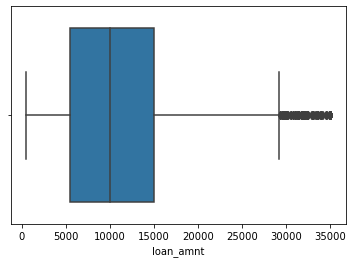

In [51]:
sns.boxplot(loans['loan_amnt'],orient='v')

In [52]:
# Basic statistics with .describe() - Quantitative Variables
loans['annual_inc'].describe()

count    3.902000e+04
mean     6.895865e+04
std      6.315594e+04
min      4.000000e+03
25%      4.080000e+04
50%      5.900000e+04
75%      8.240400e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

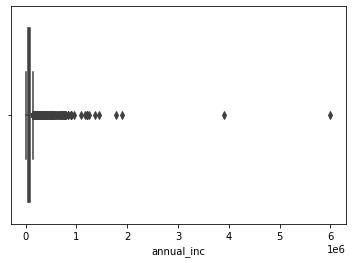

In [53]:
sns.boxplot(loans.annual_inc) #boxplot for annual income

In [54]:
loans = loans[loans["annual_inc"] < loans["annual_inc"].quantile(0.99)] #removing outliers in this column

In [55]:
loans['annual_inc'].describe() #description of the column after removing outliers

count     38629.000000
mean      65566.588630
std       35154.158509
min        4000.000000
25%       40044.000000
50%       58106.000000
75%       81000.000000
max      234000.000000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

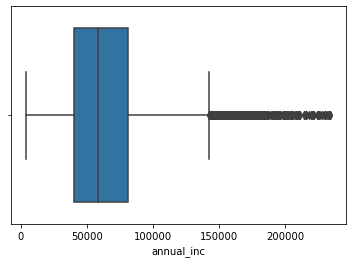

In [56]:
sns.boxplot(loans.annual_inc) #boxplot of annual income after removing outliers

In [57]:
loans['int_rate'].describe() #interest rate column description

count    38629.000000
mean        12.030387
std          3.735543
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

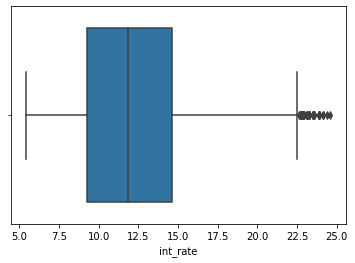

In [58]:
sns.boxplot(loans.int_rate)#boxplot for the interest rate column

### Inferences:

### Fixing Rows

In [59]:
loans.loan_status.value_counts()
# we can see that the Current refers to: Applicant is in the process
#of paying the instalments, i.e. the tenure of the loan is not yet completed.
#These candidates are not labelled as 'defaulted'.
# as they are still paying we don't know if they will be defaulted or not so we may now drop the rows with loan status current.

Fully Paid     32035
Charged Off     5468
Current         1126
Name: loan_status, dtype: int64

In [60]:
loans = loans[loans.loan_status !='Current'] # removin the rows with current loan status 

In [61]:
loans.loan_status.value_counts()

Fully Paid     32035
Charged Off     5468
Name: loan_status, dtype: int64

so we have removed the loan status: current 

# Binning

In [62]:
#Binning is used to convert continuos numerical data into categorical data.
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0


In [63]:
# Identifying and fixing categorical columns
grade_cat = pd.CategoricalDtype(categories=["G","F","E","D","C","B","A"], ordered=True)
sub_grade_cat = pd.CategoricalDtype(categories=['G5', 'G4', 'G3', 'G2', 'G1', 'F5', 'F4', 'F3', 'F2', 'F1', 'E5', 'E4', 'E3', 'E2', 'E1', 'D5', 'D4', 'D3', 'D2', 'D1', 'C5', 'C4', 'C3', 'C2', 'C1', 'B5', 'B4', 'B3', 'B2', 'B1', 'A5', 'A4', 'A3', 'A2', 'A1']
,ordered=True)

loans["grade"] = loans["grade"].astype(grade_cat)
loans["sub_grade"] = loans["sub_grade"].astype(sub_grade_cat)

cat_columns = ['home_ownership', 'addr_state', 'pub_rec_bankruptcies']
loans[cat_columns] = loans[cat_columns].apply(lambda x: x.astype('category'))

cat_columns.append("grade")
cat_columns.append("sub_grade")
print(cat_columns)

['home_ownership', 'addr_state', 'pub_rec_bankruptcies', 'grade', 'sub_grade']


In [64]:
# deriving new columns using binning 
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loans.insert(3,'loan_amnt_cats', pd.cut(loans['loan_amnt'],[0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +']))

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loans.insert(14,'annual_inc_cats',pd.cut(loans['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +']))

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loans.insert(8,'int_rate_cats',pd.cut(loans['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +']))

# categorise dti into buckets for bivariate analysis.
loans.insert(21,'dti_cats', pd.cut(loans['dti'], [0, 5, 10, 15, 20, 29.9], labels=['0-5', '05-10', '10-15', '15-20', '25+']))

We use pd.cut() method to perform binning or we can use qcut() to perform binning based on quantiles.

what we did here is instead of adding the categorical columns at last positions,we inserted them  right next to it's numerical columns to make it more clear to compare them.

In [65]:
loans.head(5)

,id,member_id,loan_amnt,loan_amnt_cats,funded_amnt,funded_amnt_inv,term_months,int_rate,int_rate_cats,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,annual_inc_cats,verification_status,issue_d,loan_status,purpose,addr_state,dti_cats,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,0-7000,5000,4975.0,36,10.65,10-13,162.87,B,B2,10,RENT,24000.0,20000-40000,Verified,2011-12-01,Fully Paid,credit_card,AZ,25+,27.65,0.0
1,1077430,1314167,2500,0-7000,2500,2500.0,60,15.27,12.5-16,59.83,C,C4,1,RENT,30000.0,20000-40000,Source Verified,2011-12-01,Charged Off,car,GA,0-5,1.00,0.0
2,1077175,1313524,2400,0-7000,2400,2400.0,36,15.96,12.5-16,84.33,C,C5,10,RENT,12252.0,0-20000,Not Verified,2011-12-01,Fully Paid,small_business,IL,05-10,8.72,0.0
3,1076863,1277178,10000,7000-14000,10000,10000.0,36,13.49,12.5-16,339.31,C,C1,10,RENT,49200.0,40000-60000,Source Verified,2011-12-01,Fully Paid,other,CA,15-20,20.00,0.0
5,1075269,1311441,5000,0-7000,5000,5000.0,36,7.90,0-10,156.46,A,A4,3,RENT,36000.0,20000-40000,Source Verified,2011-12-01,Fully Paid,wedding,AZ,10-15,11.20,0.0


In [66]:
loans.int_rate_cats.value_counts() #values of the column created int_rate_cats

0-10       11944
12.5-16    11225
10-13       9032
16 +        4560
Name: int_rate_cats, dtype: int64

In [67]:
# deriving new column for month and year from issue_d
# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

#loans.issue_d = pd.to_datetime(loans.issue_d, format='%b-%y') already done previously..
loans['year']=loans['issue_d'].dt.year
loans['month']=loans['issue_d'].dt.month

loans.head(1)

# Observations
# Two new columns month and year were derived from issue date

,id,member_id,loan_amnt,loan_amnt_cats,funded_amnt,funded_amnt_inv,term_months,int_rate,int_rate_cats,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,annual_inc_cats,verification_status,issue_d,loan_status,purpose,addr_state,dti_cats,dti,pub_rec_bankruptcies,year,month
0,1077501,1296599,5000,0-7000,5000,4975.0,36,10.65,10-13,162.87,B,B2,10,RENT,24000.0,20000-40000,Verified,2011-12-01,Fully Paid,credit_card,AZ,25+,27.65,0.0,2011,12


In [68]:
# now checking for the shape of the dataframe
loans.shape # we have 25 columns after deriving new columns


(37503, 26)

# Univariate Analysis

In [69]:
#defining functions to plot easily 

def plot_distribution(dataframe, by):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[by])

    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[by], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [70]:
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (dataframe[by].value_counts(normalize=True)*100)
    ax = values.plot.bar()
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    
    plt.subplot(1, 2, 2)
    values = (dataframe.loc[dataframe['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    ax = values.plot.bar()
    ax.set_ylabel('% in Charged Off loans', fontsize=16)

### Target Variable : Loan Status

In [71]:
loans.loan_status.value_counts()
#Inference:

#Most of the loans are Fully Paid.
#About 14% of loan are having status as defaulters.

Fully Paid     32035
Charged Off     5468
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

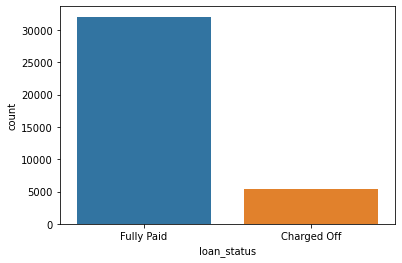

In [72]:
sns.countplot(loans.loan_status)
#countplot for loan_status


### loans amount

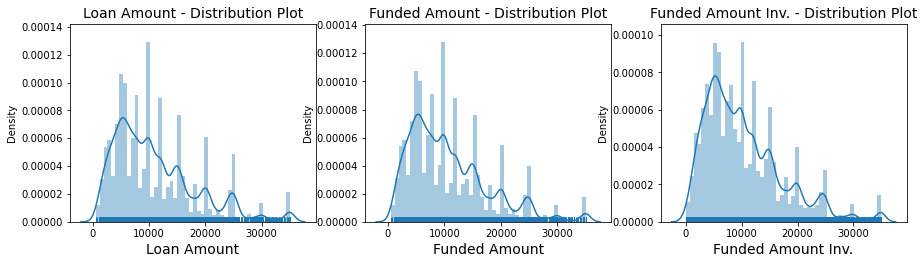

In [73]:
#here we can see that the three columns which are related to amount are being compared
#the loan_amnt is something which is known at initial stage of application
#the rest two are similar to loan amnt but they are approved by lending club and investors  only after the loan is approved
#so even in further analysis we will use only loan_amnt
plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loans['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=14)
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loans['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14)
ax.set_xlabel('Funded Amount',fontsize=14)
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loans['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14)
ax.set_xlabel('Funded Amount Inv.',fontsize=14)
plt.show()


 Observation: 
 Distribution of amounts for all three looks very much similar.
 We will work with only loan amount column for rest of our analysis.

<AxesSubplot:ylabel='loan_amnt'>

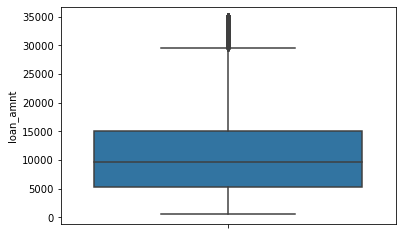

In [74]:
# LOAN_AMNT
sns.boxplot(y=loans.loan_amnt)


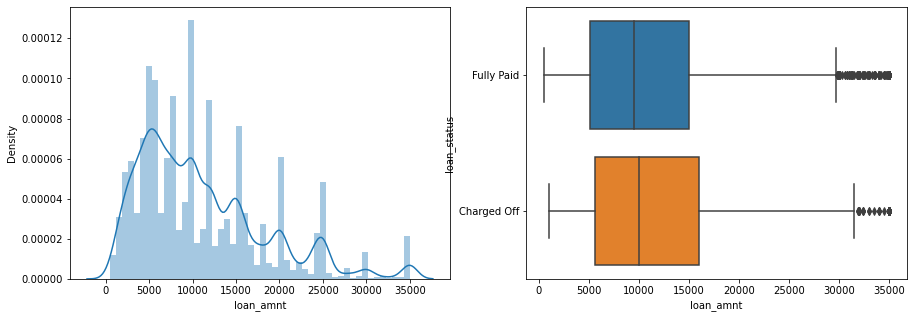

In [75]:
plot_distribution(loans, 'loan_amnt')
#distribution plot for loan_amnt

### Observations :
 Below plots show that most of the Loan amounts are in range of 5000 - 15000

<AxesSubplot:xlabel='loan_amnt_cats', ylabel='count'>

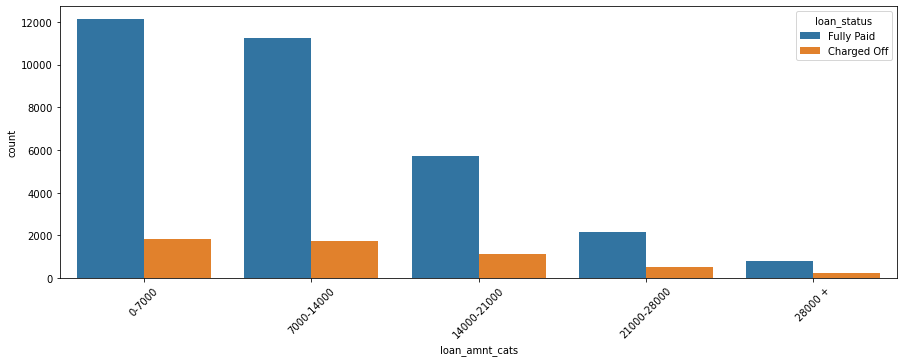

In [76]:
#countplot for loan_amnt_cat

plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.countplot(x='loan_amnt_cats', hue='loan_status', data=loans)

In [77]:
loans.groupby("loan_amnt_cats").loan_status.value_counts()/loans.groupby("loan_amnt_cats").loan_status.count()
# the segmented univariate analysis for loan_amnt and loan_status

loan_amnt_cats  loan_status
0-7000          Fully Paid     0.867549
                Charged Off    0.132451
7000-14000      Fully Paid     0.865567
                Charged Off    0.134433
14000-21000     Fully Paid     0.837601
                Charged Off    0.162399
21000-28000     Fully Paid     0.808199
                Charged Off    0.191801
28000 +         Fully Paid     0.761546
                Charged Off    0.238454
Name: loan_status, dtype: float64

### Interest rate

<Figure size 1080x360 with 0 Axes>

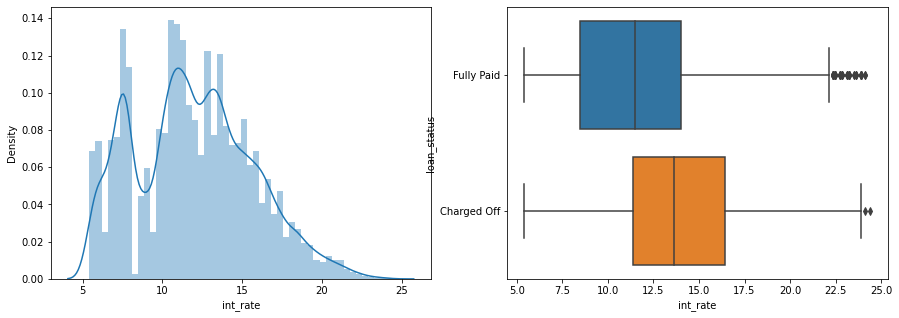

In [78]:
plt.figure(figsize=(15,5))
plot_distribution(loans, 'int_rate')
#distribution plot for interest rate

In [79]:
loans.groupby('loan_status')['int_rate'].describe() #description of grouped loan_status and int_rate

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5468.0,13.853859,3.663237,5.42,11.36,13.61,16.45,24.40
Fully Paid,32035.0,11.614732,3.609888,5.42,8.49,11.49,13.99,24.11


<AxesSubplot:xlabel='int_rate_cats', ylabel='count'>

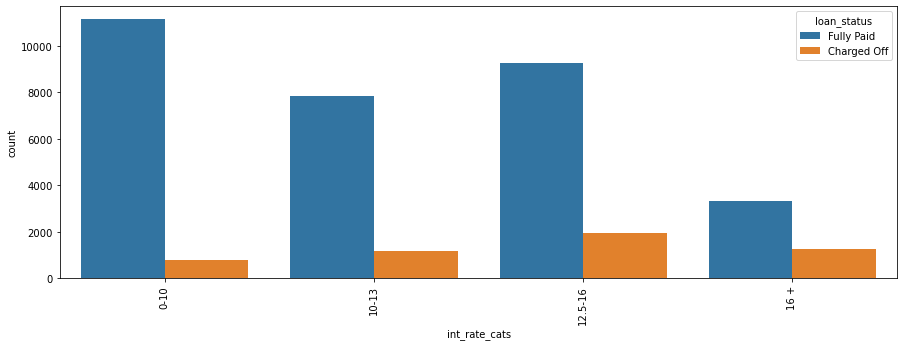

In [80]:
#count plot for categorical values of int_rate and loan_status
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x='int_rate_cats', hue='loan_status', data=loans)

Inference

Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases.

### annual_inc

<Figure size 1080x360 with 0 Axes>

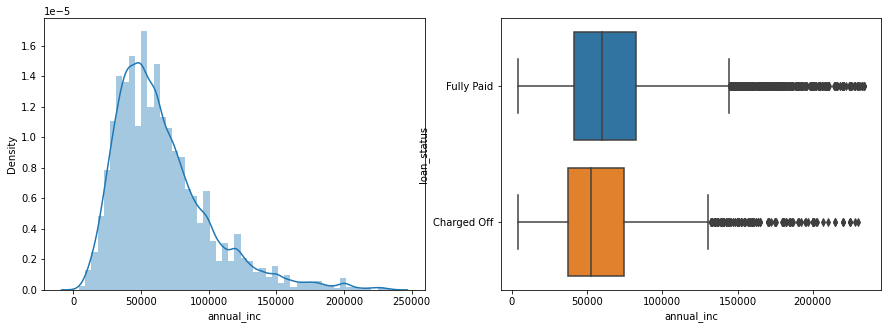

In [81]:
#annual inc distribution plot
plt.figure(figsize=(15,5))
plot_distribution(loans, 'annual_inc')

<AxesSubplot:xlabel='annual_inc_cats', ylabel='count'>

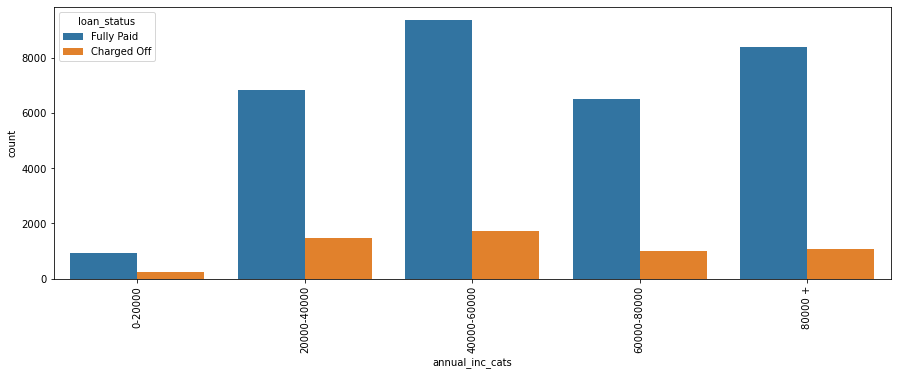

In [82]:
#count plot for categorical values of annual income and loan_status
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x='annual_inc_cats', hue='loan_status', data=loans)

Inference 

plots show that most of the borrower's Annual incomes are in range of 40000- 80000

### DTI(debt to income )

<Figure size 1080x360 with 0 Axes>

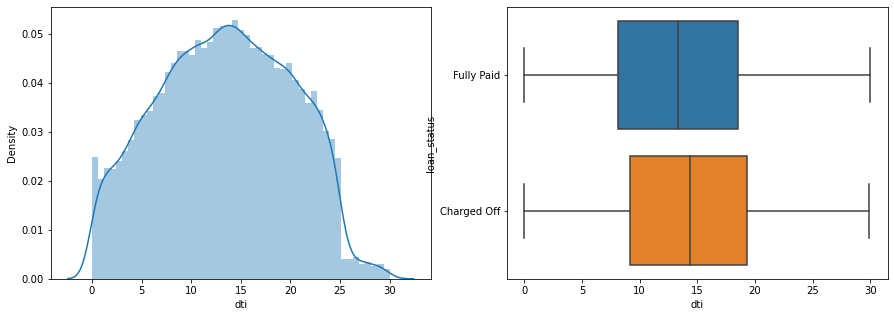

In [83]:
plt.figure(figsize=(15,5))
plot_distribution(loans, 'dti') #distribution plot and box plot of dti

<AxesSubplot:xlabel='dti_cats', ylabel='count'>

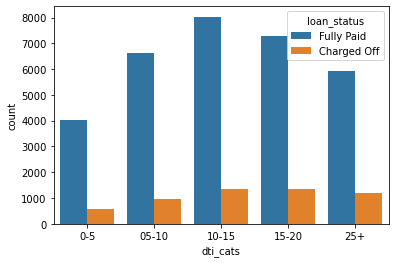

In [84]:
sns.countplot(x='dti_cats', hue='loan_status', data=loans) #countplot for loan_status and dti categorical vales

Inference: 
Most of the dti is between 10-15 and they are fully paid 

In [85]:
loans.groupby("dti_cats").loan_status.value_counts()/loans.groupby("dti_cats").loan_status.count()

dti_cats  loan_status
0-5       Fully Paid     0.877204
          Charged Off    0.122796
05-10     Fully Paid     0.872447
          Charged Off    0.127553
10-15     Fully Paid     0.854573
          Charged Off    0.145427
15-20     Fully Paid     0.843128
          Charged Off    0.156872
25+       Fully Paid     0.833099
          Charged Off    0.166901
Name: loan_status, dtype: float64

## Categorical Univariate Analysis

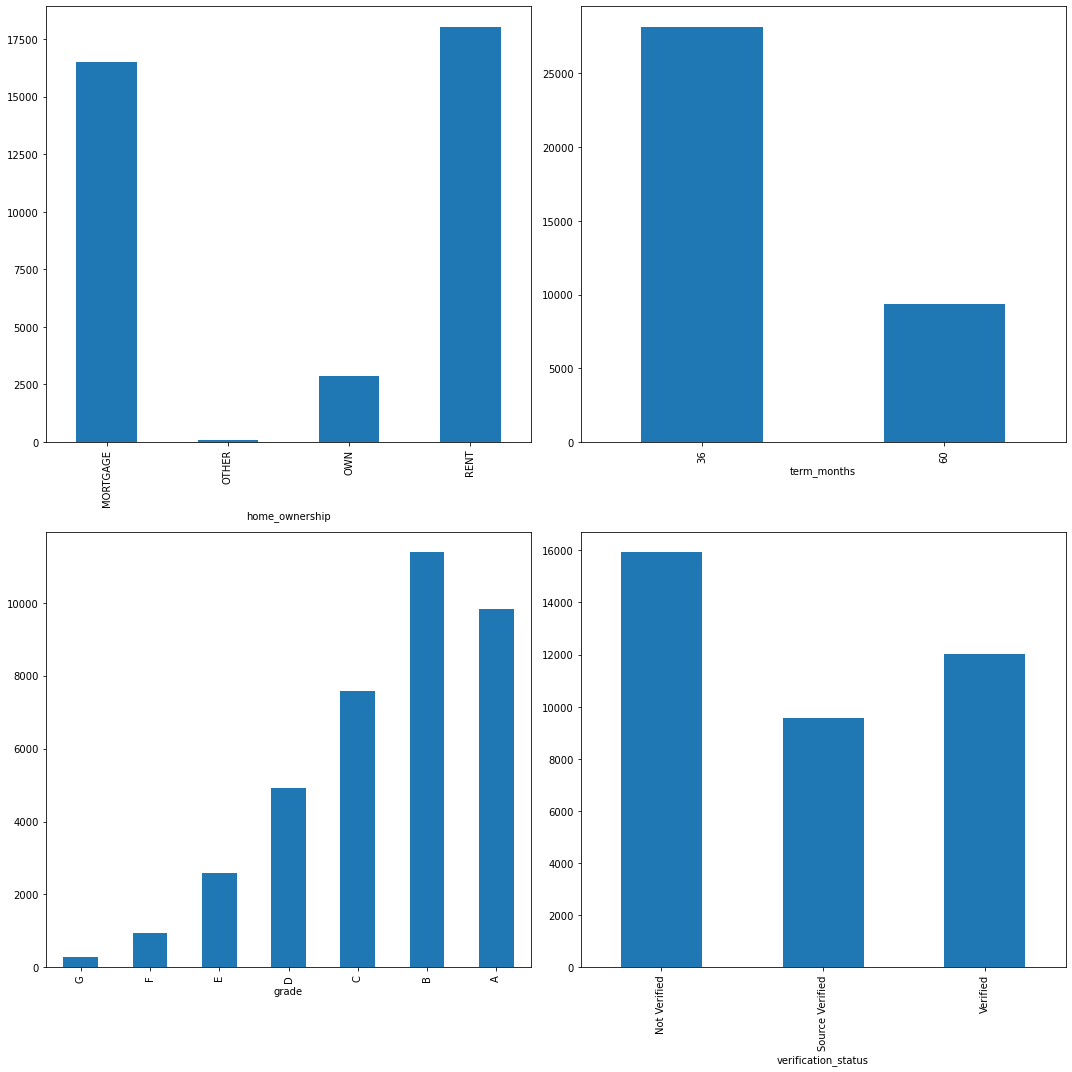

In [86]:
#univariate analysis for categorical columns
plt.figure(figsize=(15,15))
categorical_intrested_columns = ['home_ownership', 'term_months', 'grade','verification_status']

rows = len(categorical_intrested_columns)/2
for idx, val in enumerate(categorical_intrested_columns, start=1):
    plt.subplot(rows, 2, idx)
    ax = loans.groupby(val).loan_amnt.count().plot.bar()
    plt.xticks(rotation=90)
plt.tight_layout()

### Grade and Sub Grade

<AxesSubplot:xlabel='grade', ylabel='count'>

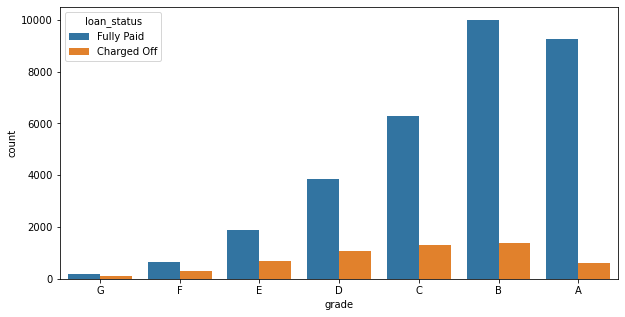

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(x='grade', hue='loan_status', data=loans)

In [88]:
# Default Rate
loans.groupby("grade").loan_status.value_counts()/loans.groupby("grade").loan_status.count()

grade  loan_status
G      Fully Paid     0.655052
       Charged Off    0.344948
F      Fully Paid     0.674121
       Charged Off    0.325879
E      Fully Paid     0.730590
       Charged Off    0.269410
D      Fully Paid     0.780513
       Charged Off    0.219487
C      Fully Paid     0.827258
       Charged Off    0.172742
B      Fully Paid     0.878087
       Charged Off    0.121913
A      Fully Paid     0.939508
       Charged Off    0.060492
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

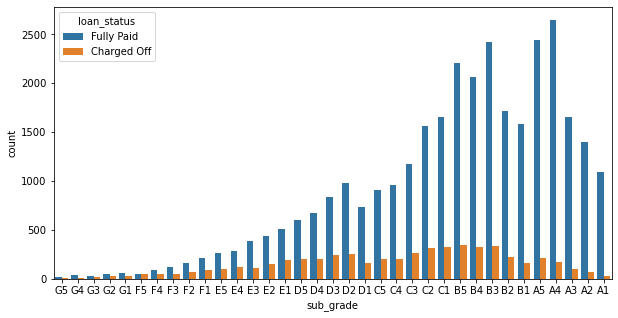

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(x='sub_grade', hue='loan_status', data=loans)

## Purpose

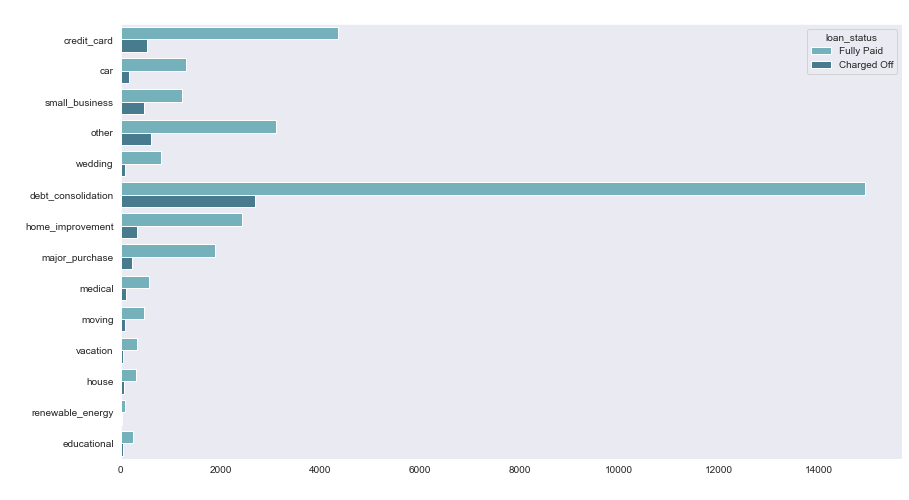

In [90]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loans,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of charged off count is also high for these loans.

### home_ownership

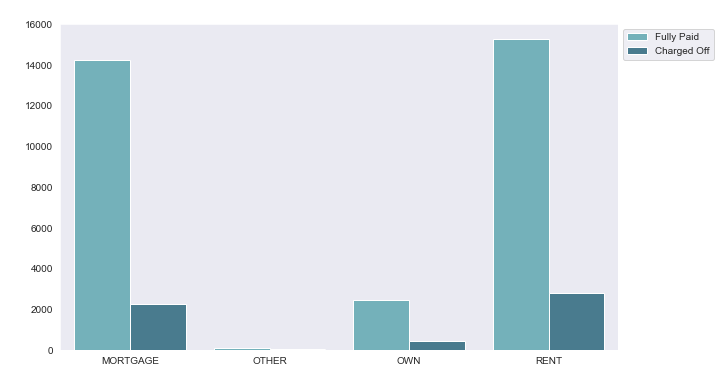

In [91]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6))
ax = sns.countplot(x="home_ownership",data=loans,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too

### verification_status

<AxesSubplot:xlabel='verification_status', ylabel='count'>

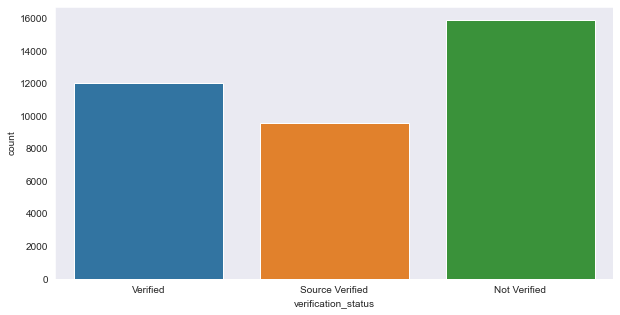

In [92]:
plt.figure(figsize=(10,5))
sns.countplot(loans['verification_status'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

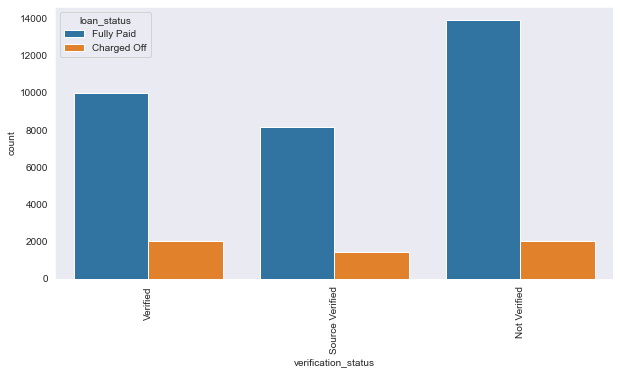

In [93]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x='verification_status', hue='loan_status', data=loans)

inference:

Verified loans show more charged Off percentage as compared to Not verified loans
    
    

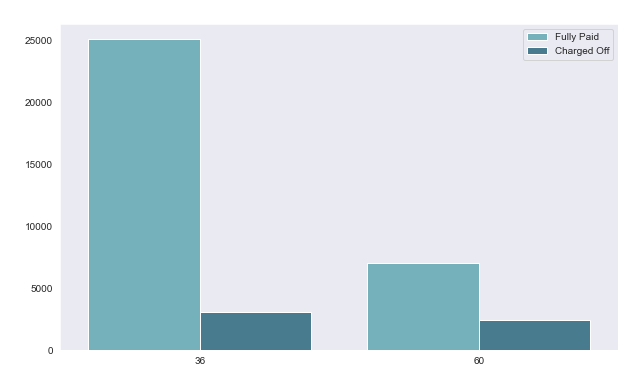

In [94]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6))
ax = sns.countplot(x="term_months",data=loans,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

### issue_d ,month, year

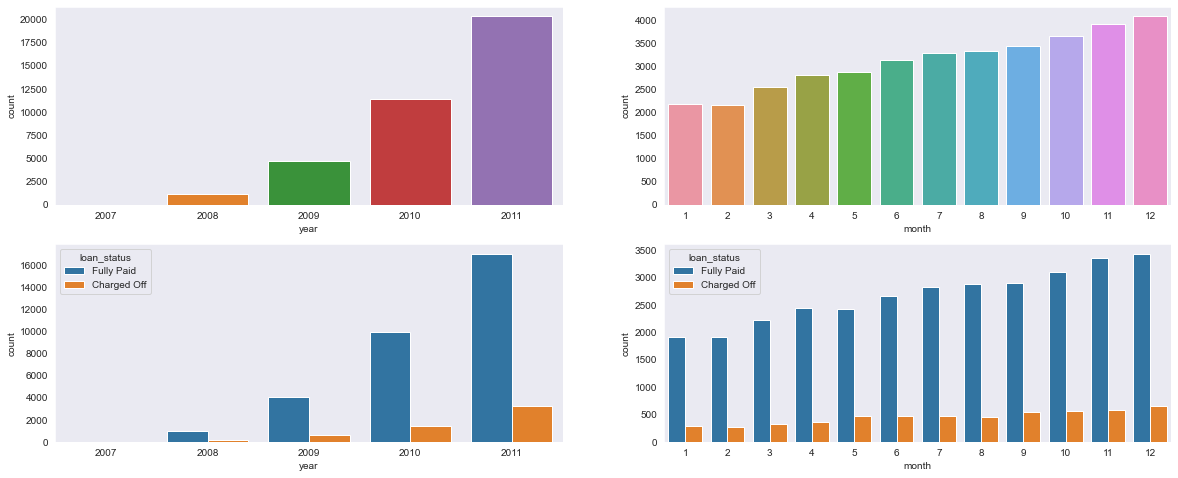

In [95]:
plt.figure(figsize=(20,8))
plt.subplot(2, 2, 1)
sns.countplot(loans['year'])

plt.subplot(2, 2, 2)
sns.countplot(loans['month'])

#Fraction of loans charged off and fully Paid
plt.subplot(2, 2, 3)
sns.countplot(x='year', hue='loan_status', data=loans)

plt.subplot(2, 2, 4)
sns.countplot(x='month', hue='loan_status', data=loans)

plt.show()

Inference:

From Aug,2007 to 2011 the loans issued have risen significantly.

Year of loan has no significant effect on likelihood of default.

usually yby end of the year the loans are fully paid.like shown in the 4th plot.

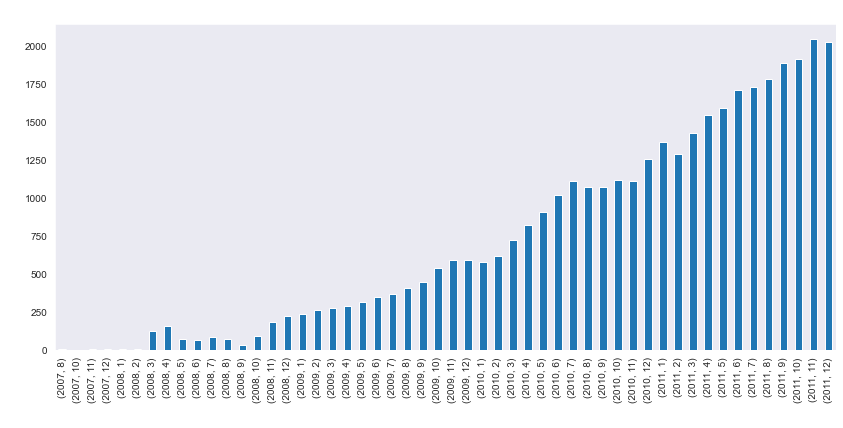

In [96]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6))
loans.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()


# Observation is that count of loan application is increasing every passing year.
# so increase in number of loan applications are adding more to number of charged off applications.
# number of loans issued in 2008( May-October) got dipped, may be due to Recession.

# Bivariate Analysis

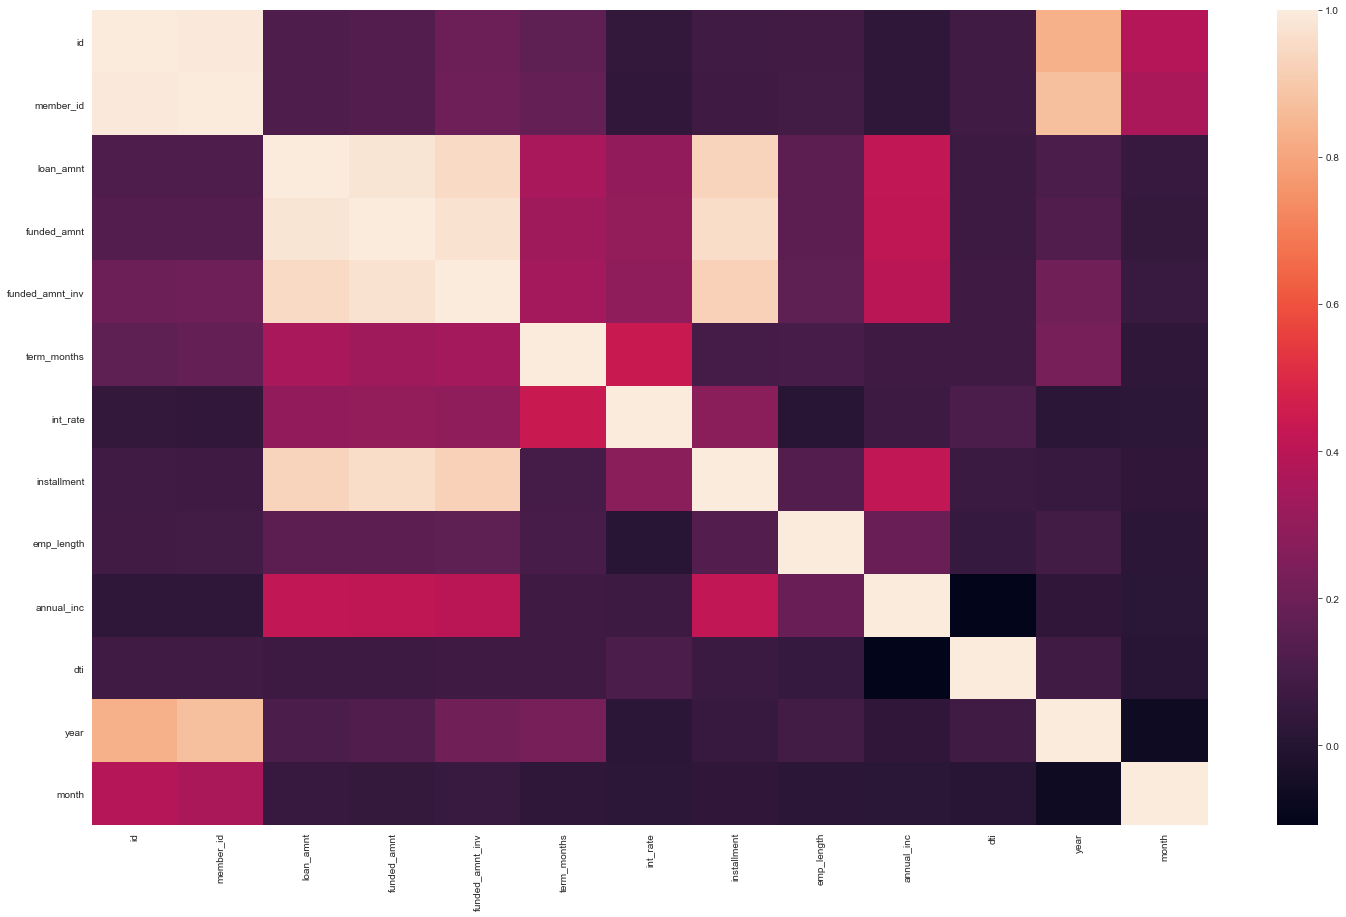

In [97]:
#correlation heatmap for the dataframe
plt.figure(figsize=(25,15))
sns.heatmap(loans.corr())
plt.xticks(rotation=90)
plt.show()

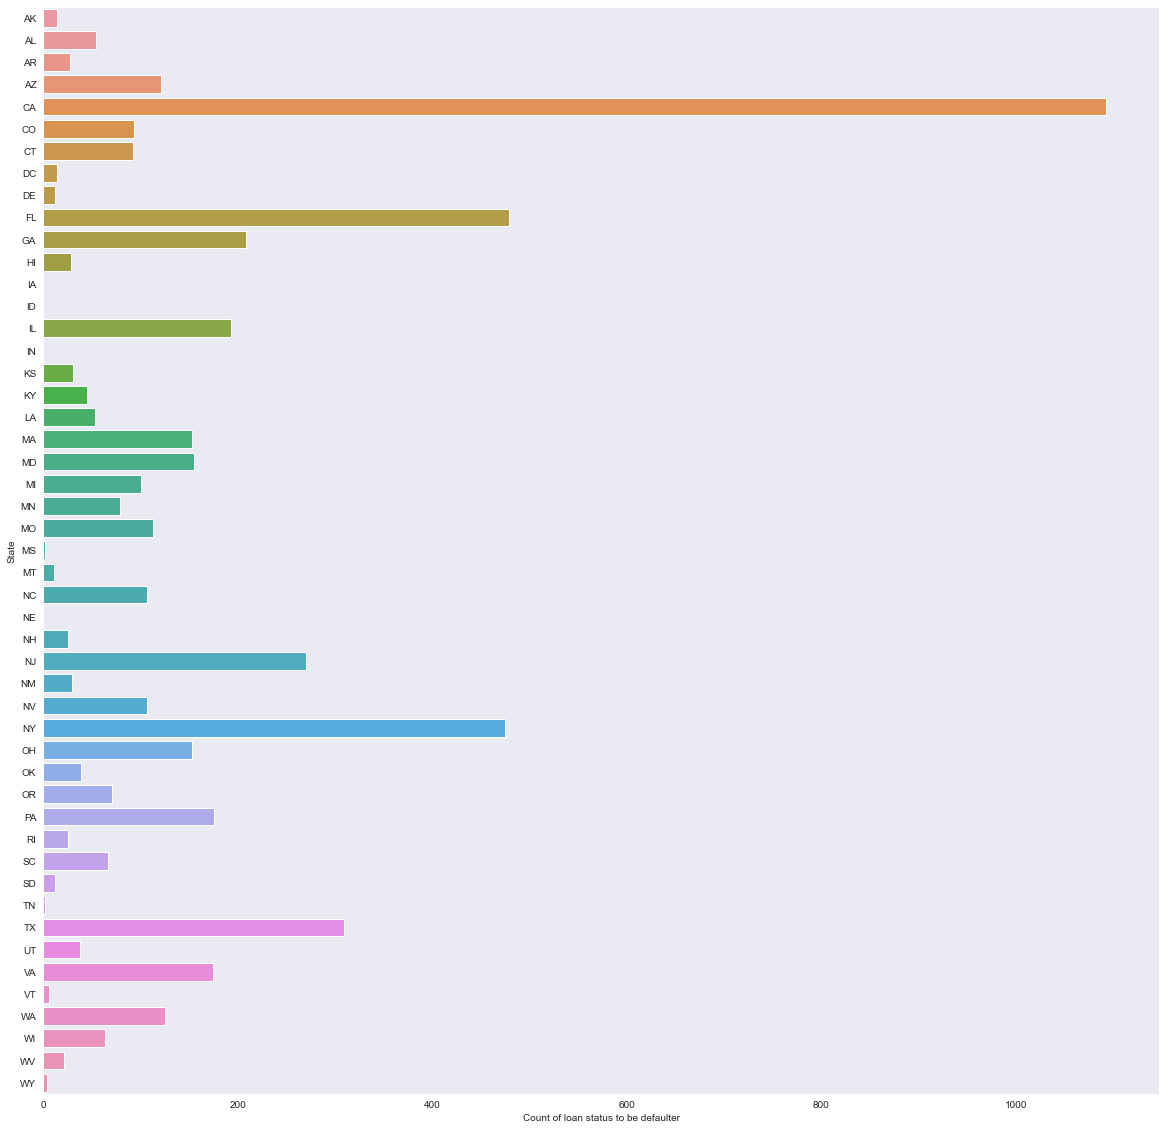

In [98]:
#bivariate analysis on states and loan status
g = loans[loans['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(20,20))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

Inference: Applicants from the state CA are having high probability to be default

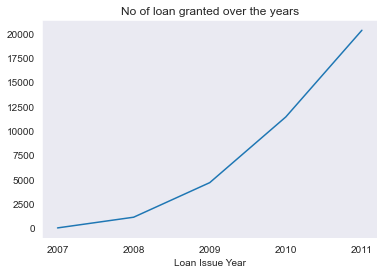

In [99]:
#loan applicants year by year in a plot
g = loans.groupby('year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

Inference: Loan Applicants have been increasing exponentially from year 2007 to 2011

In [100]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loans.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status,annual_inc_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,232,908,1140,0.203509
1,20000-40000,1484,6849,8333,0.178087
2,40000-60000,1705,9384,11089,0.153756
3,60000-80000,995,6496,7491,0.132826
4,80000 +,1052,8398,9450,0.111323


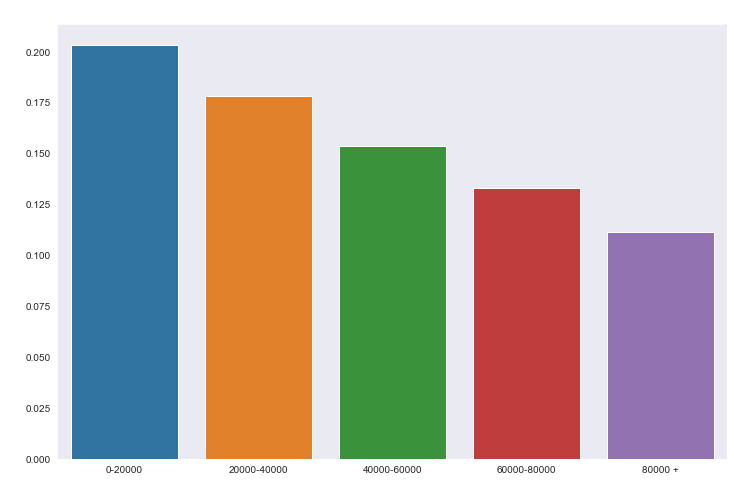

In [101]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

In [102]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loans.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,455,1218,1673,0.271967
10,renewable_energy,19,81,100,0.190000
3,educational,52,253,305,0.170492
9,other,615,3113,3728,0.164968
5,house,57,295,352,0.161932
7,medical,105,560,665,0.157895
8,moving,88,473,561,0.156863
2,debt_consolidation,2701,14926,17627,0.153231
12,vacation,53,316,369,0.143631
4,home_improvement,330,2421,2751,0.119956


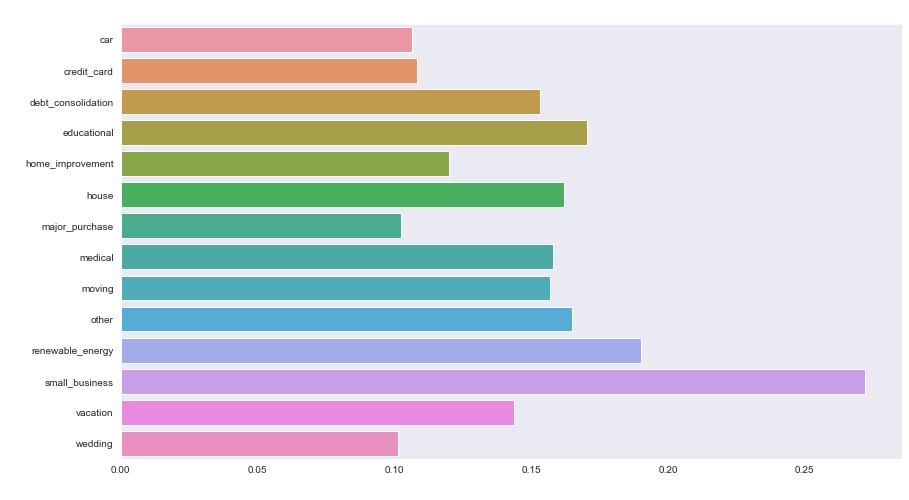

In [144]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

In [104]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = loans.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0,227,801,1028,0.220817
10,10,1289,6950,8239,0.156451
7,7,257,1418,1675,0.153433
5,5,452,2683,3135,0.144179
8,8,200,1194,1394,0.143472
1,1,1050,6316,7366,0.142547
6,6,299,1820,2119,0.141104
3,3,545,3371,3916,0.139173
4,4,444,2826,3270,0.135780
2,2,550,3612,4162,0.132148


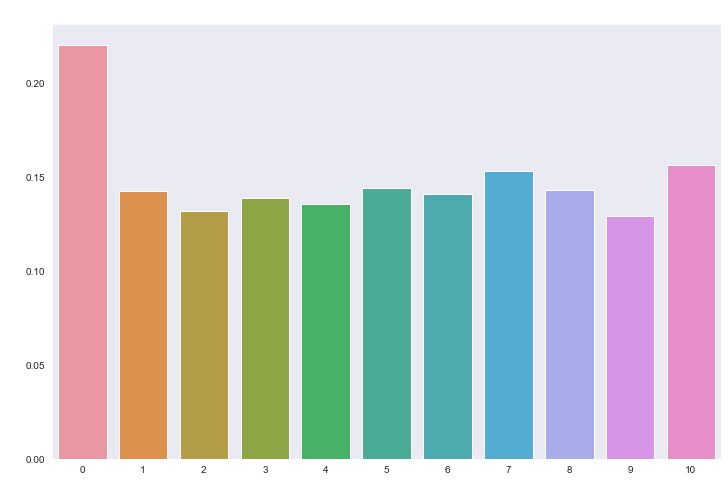

In [146]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

In [106]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = loans.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,G,99,188,287,0.344948
1,F,306,633,939,0.325879
2,E,694,1882,2576,0.269410
3,D,1079,3837,4916,0.219487
4,C,1308,6264,7572,0.172742
5,B,1387,9990,11377,0.121913
6,A,595,9241,9836,0.060492


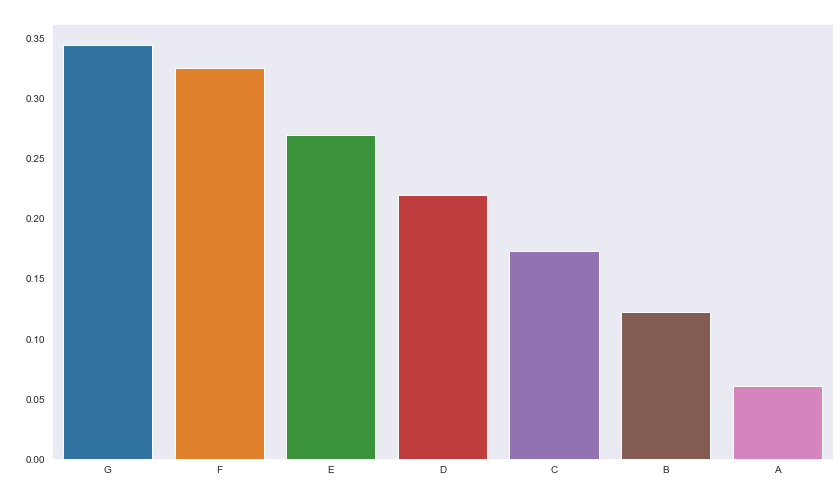

In [148]:
#lets draw it in a plot
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()
# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

In [108]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = loans.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

loan_status,int_rate_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1246,3314,4560,0.273246
2,12.5-16,1962,9263,11225,0.174788
1,10-13,1170,7862,9032,0.129539
0,0-10,800,11144,11944,0.066979


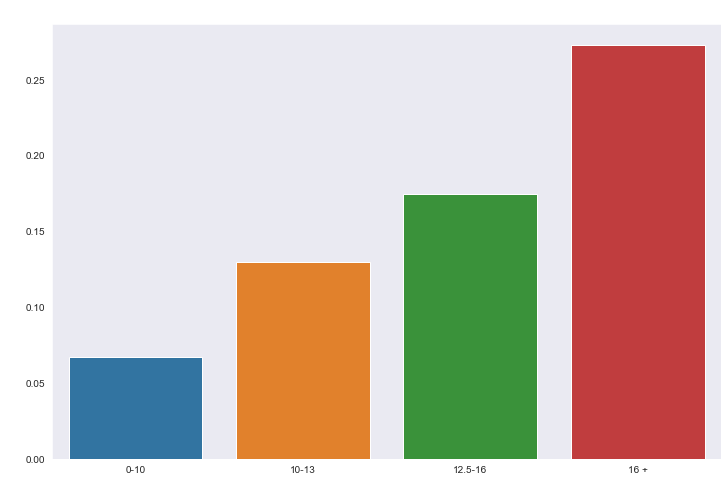

In [109]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

### Bivariate Analysis - Puprose of loan vs Loan amount

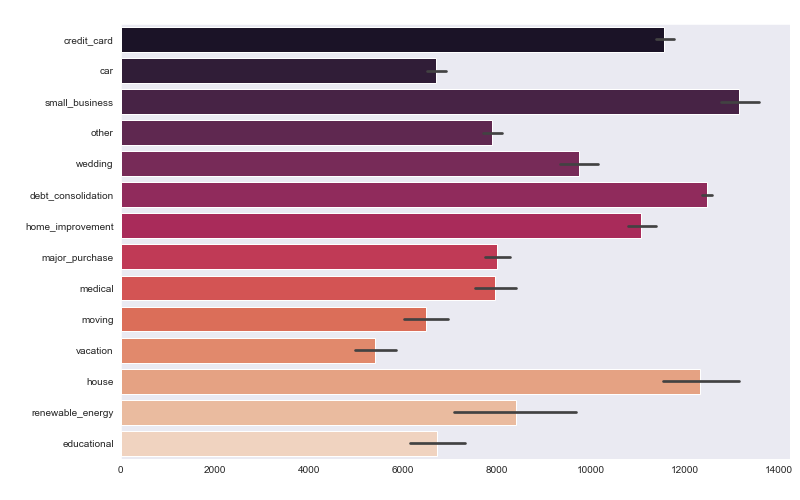

In [118]:
plt.figure(figsize=(12,8))
ax = sns.barplot(y='purpose', x='loan_amnt', data =loans,palette='rocket')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

## Bivariate Analysis - Term of loan vs Interest Rate

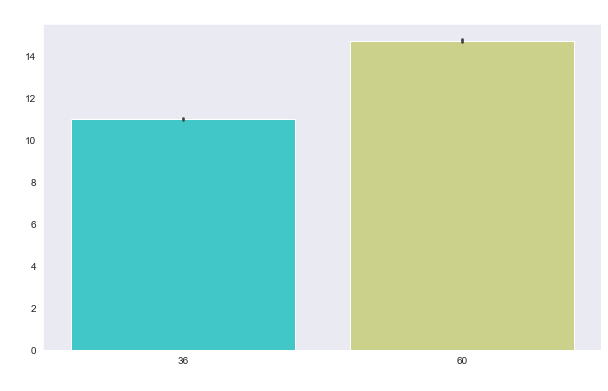

In [119]:
# Bar Plot with numeric values of interest  rate

plt.figure(figsize=(10,6))
ax = sns.barplot(y='int_rate', x='term_months', data =loans,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

## Bivariate Analysis - Purpose vs Interest Rate

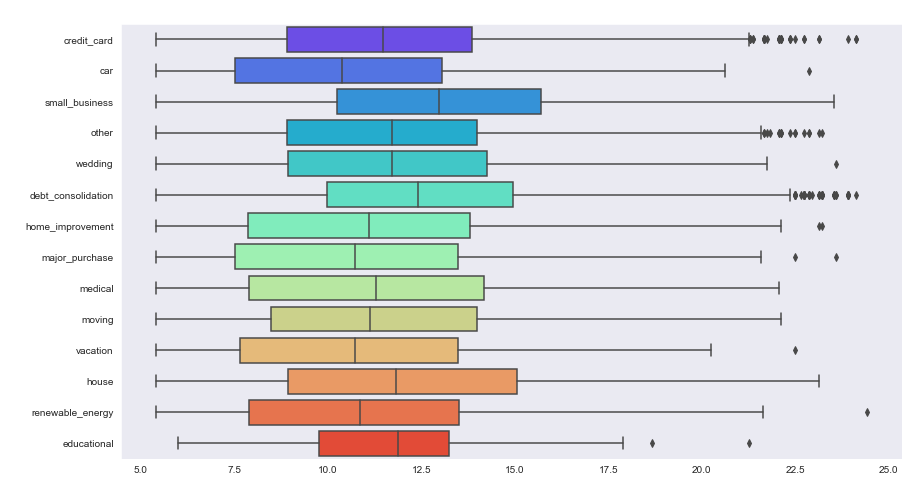

In [120]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate', y='purpose', data =loans,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.

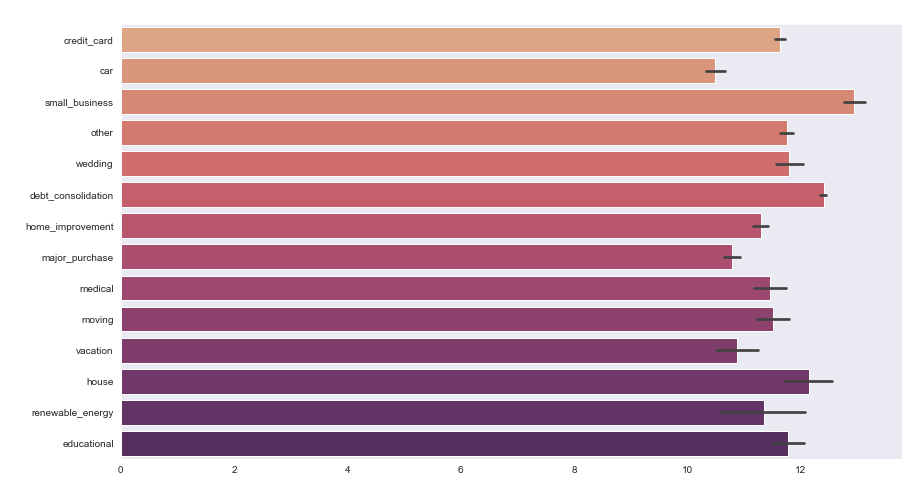

In [132]:
#bar plot for purpose vs interest
plt.figure(figsize=(14,8))
ax = sns.barplot(x='int_rate', y='purpose', data =loans,palette='flare')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()



##  Bivariate Analysis - Grade vs Interest Rate

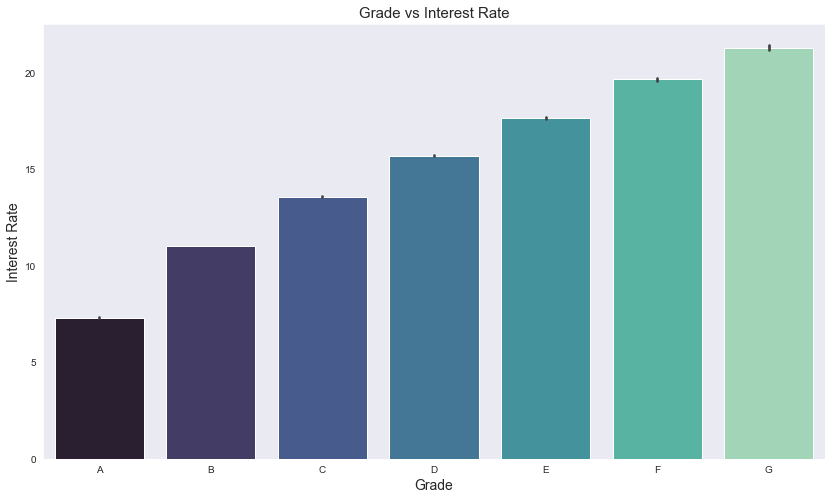

In [131]:

# Bar Plot

plt.figure(figsize=(14,8))
ax = sns.barplot(y='int_rate', x='grade', data =loans,palette='mako',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Grade',fontsize=14)
plt.show()

# Observations:
# A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
# It is clear that intrest rate is increasing with grades moving from A to F.

##  Bivariate Analysis - Loan amount vs Interest Rate

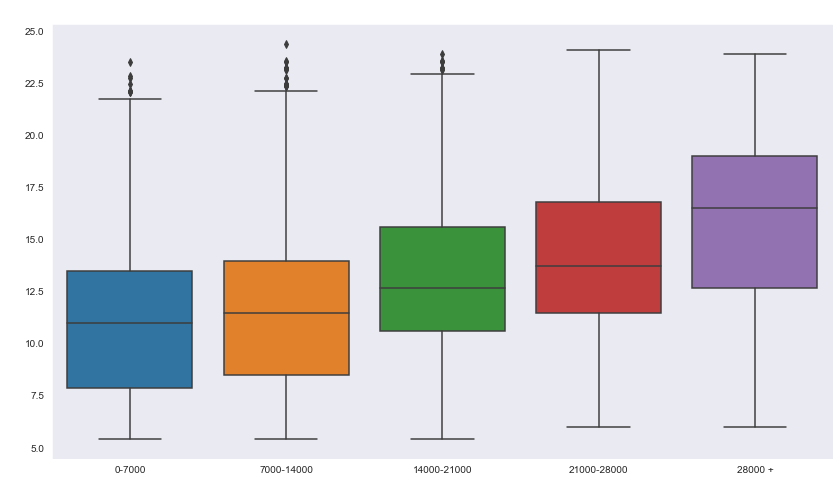

In [142]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loans)
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the
# interest rate.

## Bivariate Analysis - dti vs Interest Rate

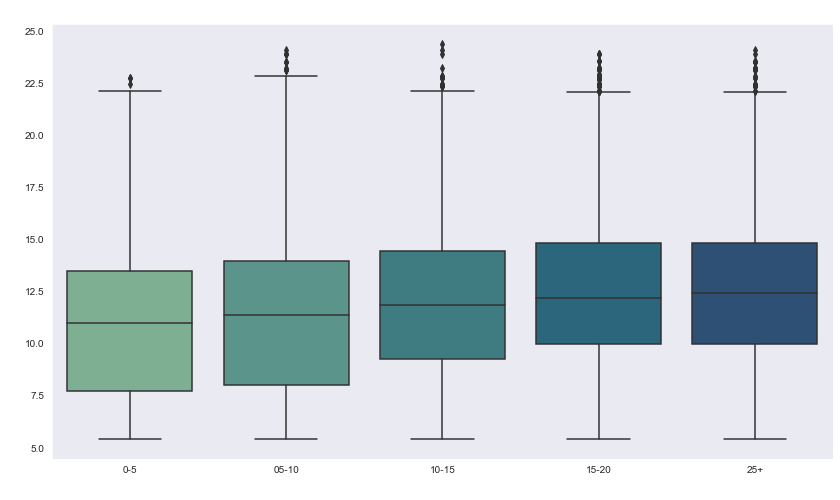

In [136]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='dti_cats', data =loans,palette='crest')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

# Observations:
# If your DTI is low enough you may get a lower interest rate.
# Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.


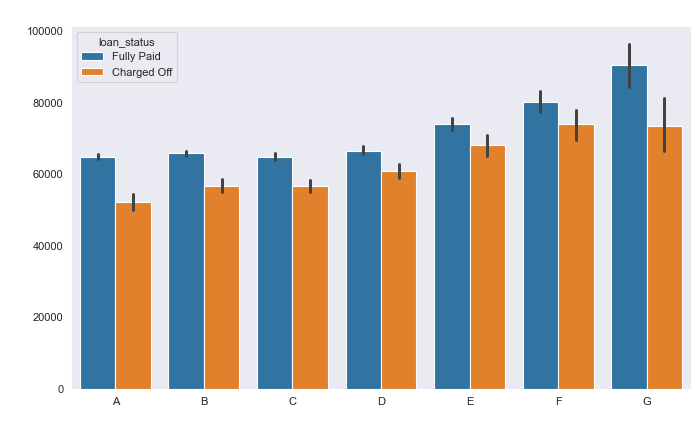

In [139]:
#BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loans, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
# who'paid fully' for each and every grade (i.e. at same interest range)

# Multivariate Analysis - Pair Plots

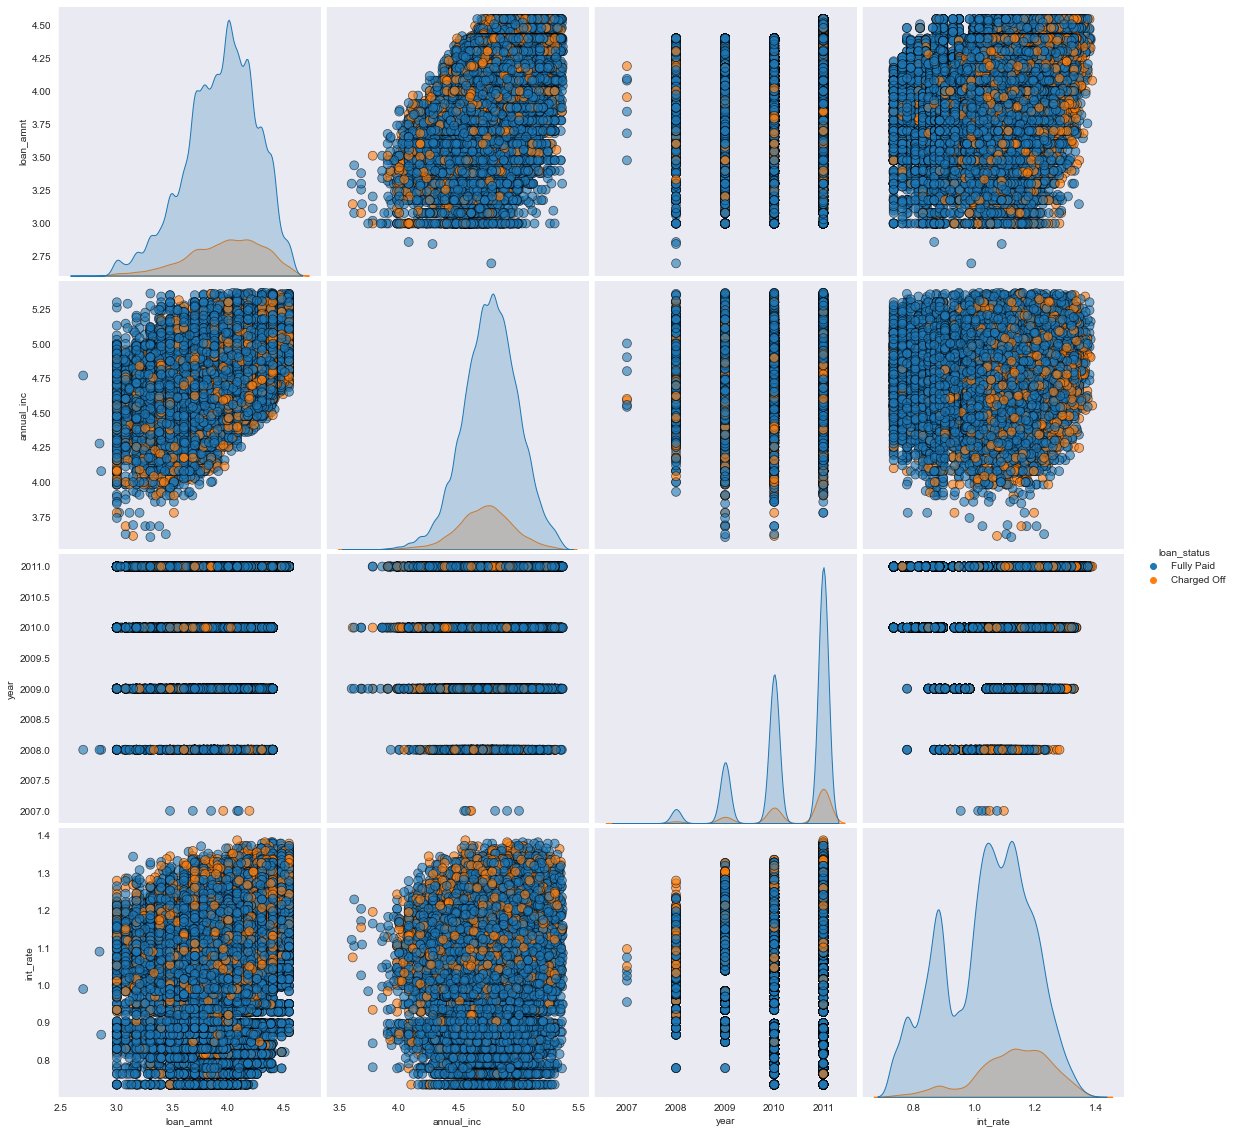

In [140]:
loan_pair = loans[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

# Observation:
# Higher the interest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly.
# increase in number of charged off with increase in year.
# interest rate is increasing with loan amount increase

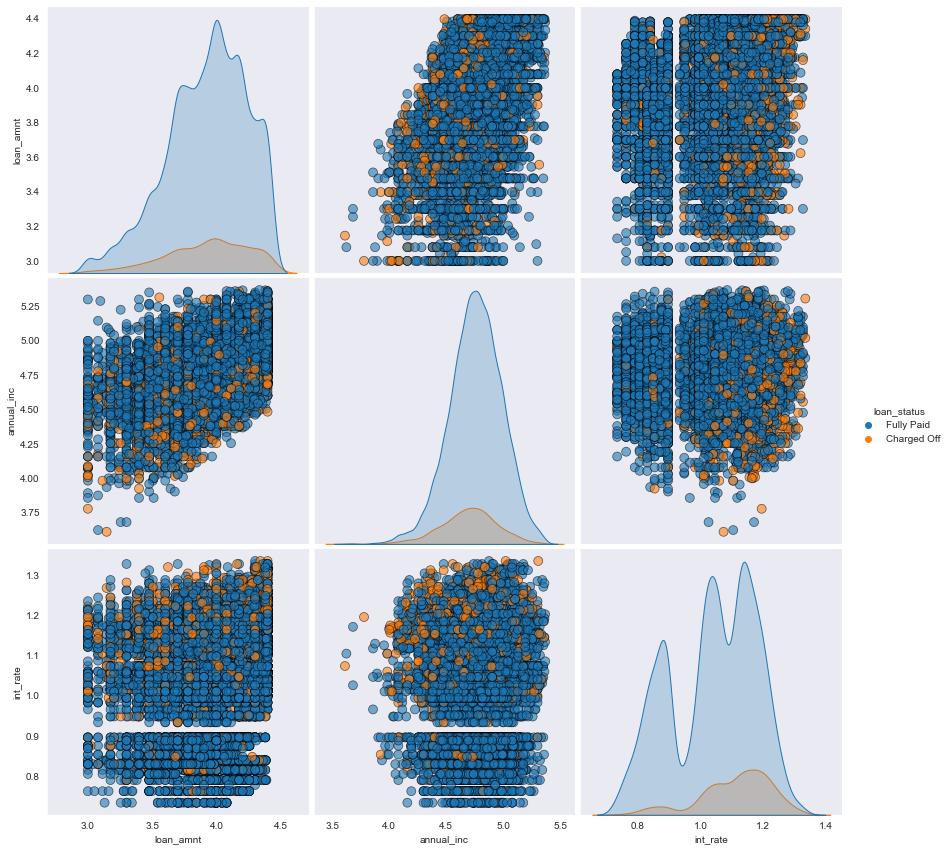

In [141]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.
# Above plot is too dense so just pick year 2010 for getting some insights.

sns.pairplot(loan_pair[loan_pair['year'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Observation:
# Higher the interest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly
# Interest rate is increasing with loan amount increase this results in high charged off.

# Recommendations:


1. Grading system of the LC is working as expected.

2. Clients belonging to state CA has high rate of default so extra scrutiny is necessary.More background checks of the loan applicants will be a good start.

3. when the purpose is debt consolidation or small business there is a high risk of default so we can either increase the interest rate or reduce the loan amount.

4. In segmented analysis of loan amount we have discovered that higher loan amount has higher risk of default.It would be a cautious step to see if the applicant has all the factors to be a good applicant.

5. Higher interest rates have higher chance of default  so needs extra scrutiny.
